In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os,sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

os.chdir('..')

In [3]:
from src.loader import DataLoader

loader = DataLoader()

table_name = 'xdr_data'
df = loader.load_data(table_name)



{'DATABASE_NAME': 'Telecom', 'DATABASE_USER': 'missy', 'DATABASE_PASSWORD': '123456', 'DATABASE_HOST': 'localhost', 'DATABASE_PORT': '5432'}


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [7]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [8]:
mean_values = df.select_dtypes(include='number').mean()
string_columns = df.select_dtypes(include='object').columns

# Fill missing values with mean
df_filled = df.fillna(mean_values)
df_filled = df[string_columns].fillna("Unknown")
print(df.isnull().sum())

df.columns

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


Text(0, 0.5, 'Handset Type')

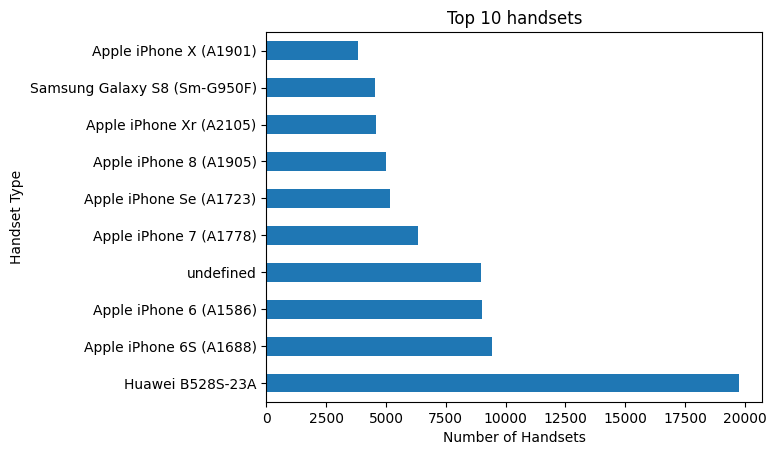

In [9]:
top_10_handsets = df_filled['Handset Type'].value_counts().head(10)
ax = top_10_handsets.plot(kind='barh', title='Top 10 handsets')

ax.set_xlabel('Number of Handsets'); ax.set_ylabel('Handset Type')

Text(0, 0.5, 'Number of Handsets')

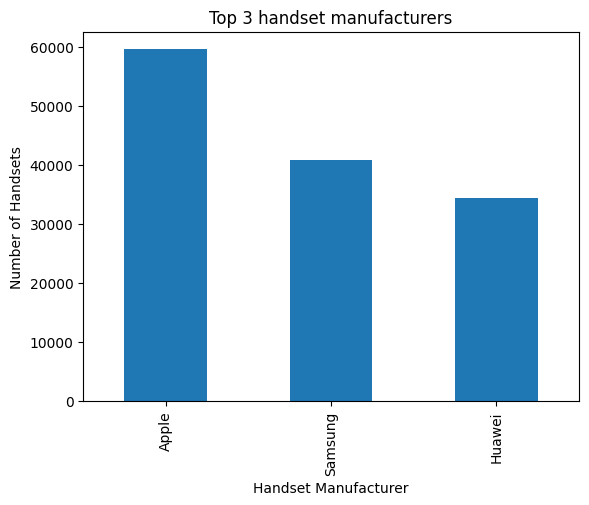

In [10]:
top_3_handsets_manufacturers = df_filled['Handset Manufacturer'].value_counts().head(3)
ax = top_3_handsets_manufacturers.plot(kind='bar', title='Top 3 handset manufacturers')

ax.set_xlabel('Handset Manufacturer'); ax.set_ylabel('Number of Handsets')


Text(0.5, 0, 'Number of Handsets')

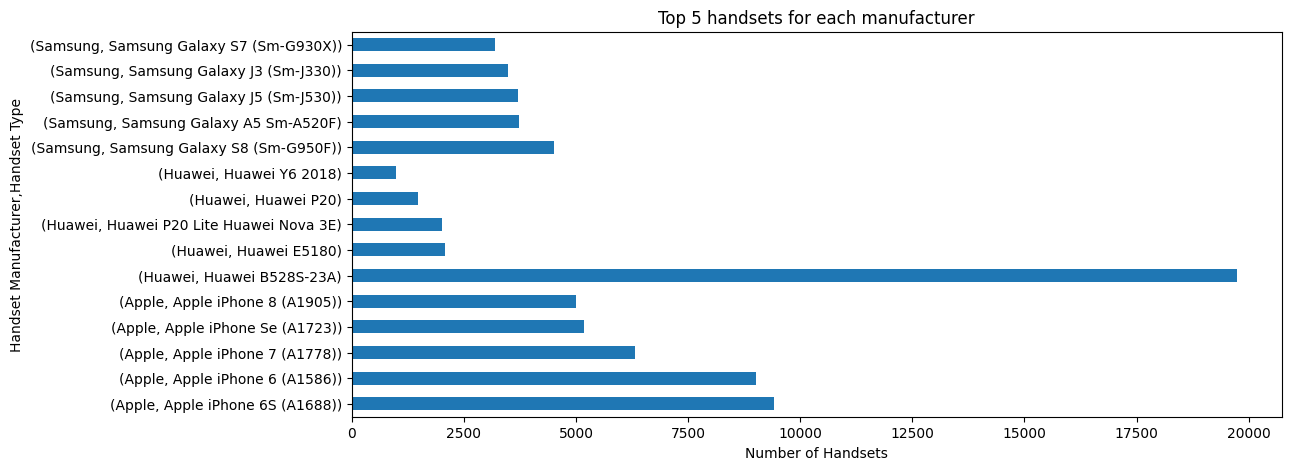

In [11]:
# Filter the DataFrame for top 3 manufacturers
filtered_df = df_filled[df_filled['Handset Manufacturer'].isin(top_3_handsets_manufacturers.index.tolist())]

# Group by 'Handset Manufacturer' and get top 5 handsets for each manufacturer
ax = filtered_df.groupby('Handset Manufacturer')['Handset Type']\
    .value_counts()\
    .groupby(level=0, group_keys=False)\
    .nlargest(5) \
    .plot(kind='barh', figsize=(12,5), title='Top 5 handsets for each manufacturer')

ax.set_xlabel('Number of Handsets')


In [13]:
# Step 1: Group the data by user
grouped_data = df.groupby('MSISDN/Number')

aggregated_data = grouped_data.agg({
    'Bearer Id': 'count',                     
    'Dur. (ms)': 'sum',                        
    'Total DL (Bytes)': 'sum',                
    'Total UL (Bytes)': 'sum',              
    'Social Media DL (Bytes)': 'sum',         
    'Social Media UL (Bytes)': 'sum',        
    'Google DL (Bytes)': 'sum',           
    'Google UL (Bytes)': 'sum',           
    'Email DL (Bytes)': 'sum',               
    'Email UL (Bytes)': 'sum',          
    'Youtube DL (Bytes)': 'sum',             
    'Youtube UL (Bytes)': 'sum',              
    'Netflix DL (Bytes)': 'sum',              
    'Netflix UL (Bytes)': 'sum',             
    'Gaming DL (Bytes)': 'sum',              
    'Gaming UL (Bytes)': 'sum',             
    'Other DL (Bytes)': 'sum',                
    'Other UL (Bytes)': 'sum'                
})

aggregated_data.columns = ['Num_of_xDR_sessions', 'Session_duration', 'Total_DL', 'Total_UL',
                           'Social_Media_DL', 'Social_Media_UL', 'Google_DL', 'Google_UL',
                           'Email_DL', 'Email_UL', 'Youtube_DL', 'Youtube_UL',
                           'Netflix_DL', 'Netflix_UL', 'Gaming_DL', 'Gaming_UL',
                           'Other_DL', 'Other_UL']

print(aggregated_data.head())


               Num_of_xDR_sessions  Session_duration      Total_DL  \
MSISDN/Number                                                        
3.360100e+10                     1          116720.0  8.426375e+08   
3.360100e+10                     1          181230.0  1.207552e+08   
3.360100e+10                     1          134969.0  5.566597e+08   
3.360101e+10                     1           49878.0  4.019932e+08   
3.360101e+10                     2           37104.0  1.363130e+09   

                 Total_UL  Social_Media_DL  Social_Media_UL   Google_DL  \
MSISDN/Number                                                             
3.360100e+10   36053108.0        2206504.0          25631.0   3337123.0   
3.360100e+10   36104459.0        2598548.0          62017.0   4197697.0   
3.360100e+10   39306820.0        3148004.0          47619.0   3343483.0   
3.360101e+10   20327526.0         251469.0          28825.0   5937765.0   
3.360101e+10   94280527.0        2861230.0          51312.0

In [16]:
#Analzing the basic metrics in the dataset

mean_values = df_filled.mean(numeric_only=True)
median_values = df_filled.median(numeric_only=True)
mode_values = df_filled.mode()

print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("Mode values:")
print(mode_values)


Mean values:
Series([], dtype: float64)

Median values:
Series([], dtype: float64)
Mode values:
            Start             End Last Location Name Handset Manufacturer  \
0  4/26/2019 7:25  4/25/2019 0:01            Unknown                Apple   

       Handset Type  
0  Huawei B528S-23A  


In [17]:

date_columns = ['Start', 'End']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  

non_numeric_columns = df_filled.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

numeric_df = df_filled.select_dtypes(include=['number'])


variance_values = numeric_df.var()
std_deviation_values = numeric_df.std()


print("Variance values:")
print(variance_values)
print("\nStandard deviation values:")
print(std_deviation_values)


Non-numeric columns: Index(['Start', 'End', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')
Variance values:
Series([], dtype: float64)

Standard deviation values:
Series([], dtype: float64)


In [20]:

# Define functions for plotting suitable charts
def plot_histogram(data, column_name):
    plt.figure(figsize=(12, 10))
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()

def plot_boxplot(data, column_name):
    plt.figure(figsize=(12, 10))
    plt.boxplot(data, vert=False)
    plt.title(f'Boxplot of {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.grid(True)
    plt.show()

def plot_bar_chart(data, column_name):
    plt.figure(figsize=(12, 10))
    data.value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(axis='y')
    plt.show()

# Plot appropriate visualizations for each column
for column in numeric_df.columns:
    if column == 'Session duration':
        plot_histogram(numeric_df[column], column)
    elif column == 'Total DL (Bytes)' or column == 'Total UL (Bytes)':
        plot_boxplot(numeric_df[column], column)
    else:
        plot_bar_chart(numeric_df[column], column)


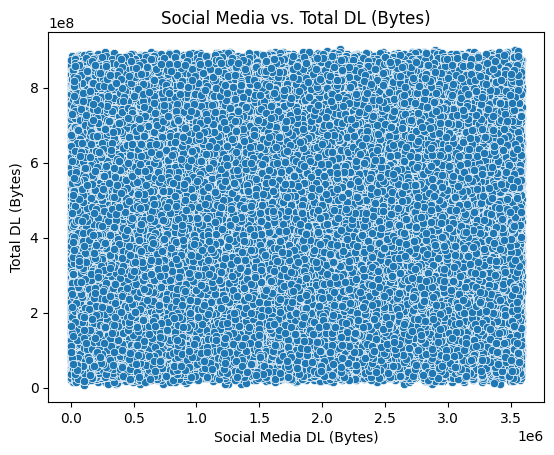

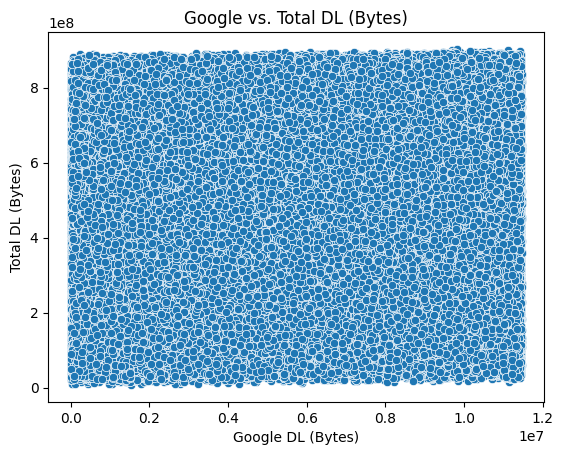

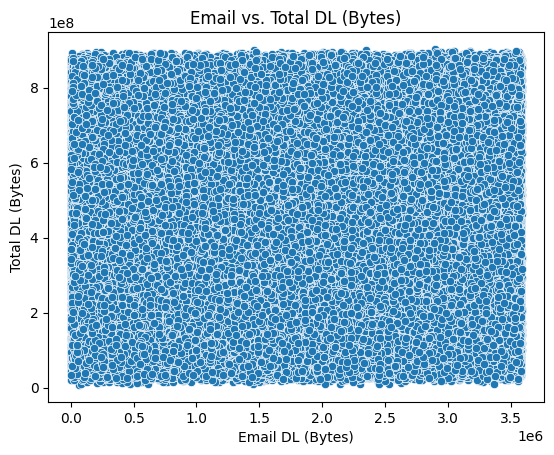

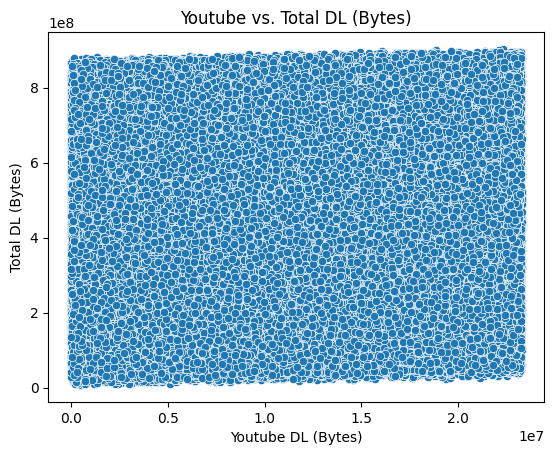

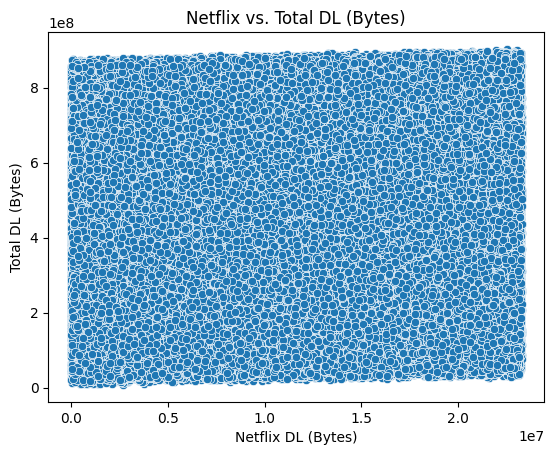

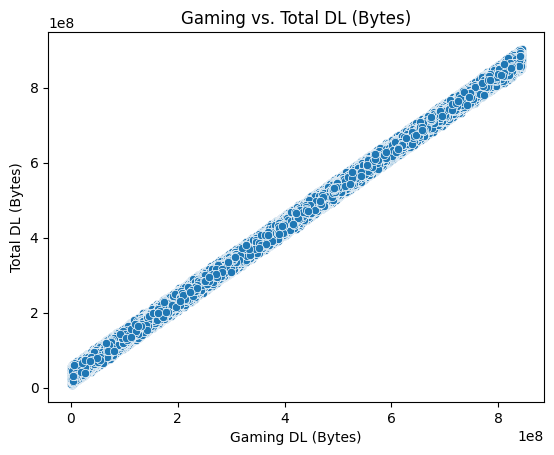

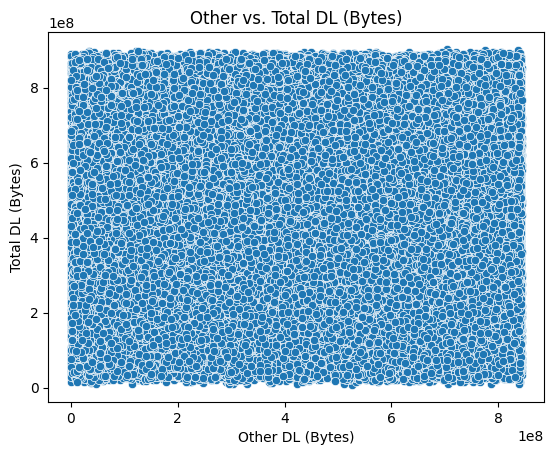

In [21]:
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
for app in applications:
    sns.scatterplot(x=app + ' DL (Bytes)', y='Total DL (Bytes)', data=df)
    plt.xlabel(app + ' DL (Bytes)')
    plt.ylabel('Total DL (Bytes)')
    plt.title(app + ' vs. Total DL (Bytes)')
    plt.show()


In [26]:

session_duration_column = 'Dur. (ms)'

df['Decile'] = pd.qcut(df[session_duration_column], q=5, labels=['1st', '2nd', '3rd', '4th', '5th'])

total_data_per_decile = df.groupby('Decile')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

print(total_data_per_decile)



        Total DL (Bytes)  Total UL (Bytes)
Decile                                    
1st         1.364932e+13      1.234248e+12
2nd         2.165798e+13      1.962471e+12
3rd         5.580722e+12      5.066822e+11
4th         1.362235e+13      1.232586e+12
5th         1.368615e+13      1.232194e+12


/var/folders/14/f3j86z751wb6b5yyjr_10z0c0000gn/T/ipykernel_57586/1587889092.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_data_per_decile = df.groupby('Decile')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()


In [27]:
print(df.columns)
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

correlation_matrix = df[['Social_Media_DL_Bytes', 'Google_DL_Bytes', 'Email_DL_Bytes',
                         'Youtube_DL_Bytes', 'Netflix_DL_Bytes', 'Gaming_DL_Bytes',
                         'Other_DL_Bytes']].corr()

print(correlation_matrix)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [28]:

pca = PCA(n_components=2)
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

pca_result = pca.fit_transform(df[['Social_Media_DL_Bytes', 'Google_DL_Bytes', 'Email_DL_Bytes',
                         'Youtube_DL_Bytes', 'Netflix_DL_Bytes', 'Gaming_DL_Bytes',
                         'Other_DL_Bytes']])


print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.501595   0.49753482]
